<a href="https://colab.research.google.com/github/LabAutoFIE/LabAutoFIE/blob/main/CicloIdeal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LIBRERIAS:
import numpy as np
import matplotlib.pyplot as plt

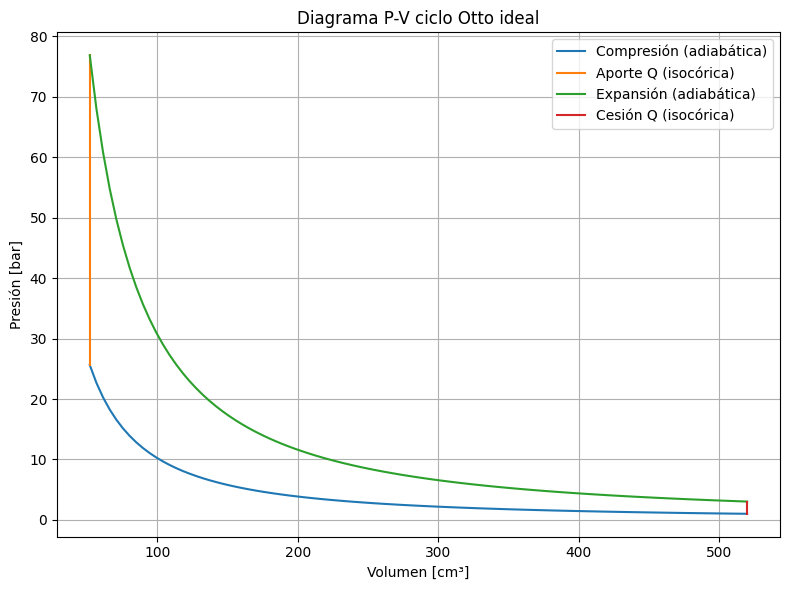

In [ ]:
# *** CICLO IDEAL P-V 4 TIEMPOS ***
# PARÁMETROS del AIRE:
gamma =1.403 # coeficiente adiabático Aire
Patm = 101325 # presión atmosférica inicial [Pa]
Vtotal = 520e-6 # volumen inicial Vc+Vcc [m³] en PMI
Rc = 10 # Relación de compresión

# VOLÚMENES en c/punto:
V2 = Vtotal / Rc
V3 =  V2 # Isocórico
V4 = Vtotal # expansión adiabática

# PRESIONES en c/punto con las relaciones adiabáticas:
P2 = Patm * (Vtotal/V2)**gamma # Adiabático
P3 = P2 * 3 # Aumento P ideal x combustión eficiente (2 podría ser valor combustión moderada)
P4 = P3 * (V3 / V4)**gamma # Adiabático

# FUNCIONES p/curvas:
def adiabatic_curve(P_start, V_start, V_end, steps=100):
    V = np.linspace(V_start, V_end, steps)
    P = P_start * (V_start / V)**gamma
    return V, P

def isochoric_line(P_start, P_end, V_const, steps=100):
    P = np.linspace(P_start, P_end, steps)
    V = np.full_like(P, V_const)
    return V, P

# CURVAS POR CICLOS:
V12, P12 = adiabatic_curve(Patm, Vtotal, V2)  # Compresión
V23, P23 = isochoric_line(P2, P3, V2)   # Adición de calor
V34, P34 = adiabatic_curve(P3, V3, V4)  # Expansión
V41, P41 = isochoric_line(P4, Patm, Vtotal)   # Rechazo de calor

# GRAFICO:
plt.figure(figsize=(8,6))
plt.plot(V12*1e6, P12/1e5, label='Compresión (adiabática)')
plt.plot(V23*1e6, P23/1e5, label='Aporte Q (isocórica)')
plt.plot(V34*1e6, P34/1e5, label='Expansión (adiabática)')
plt.plot(V41*1e6, P41/1e5, label='Cesión Q (isocórica)')

plt.xlabel('Volumen [cm³]')
plt.ylabel('Presión [bar]')
plt.title('Diagrama P-V ciclo Otto ideal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

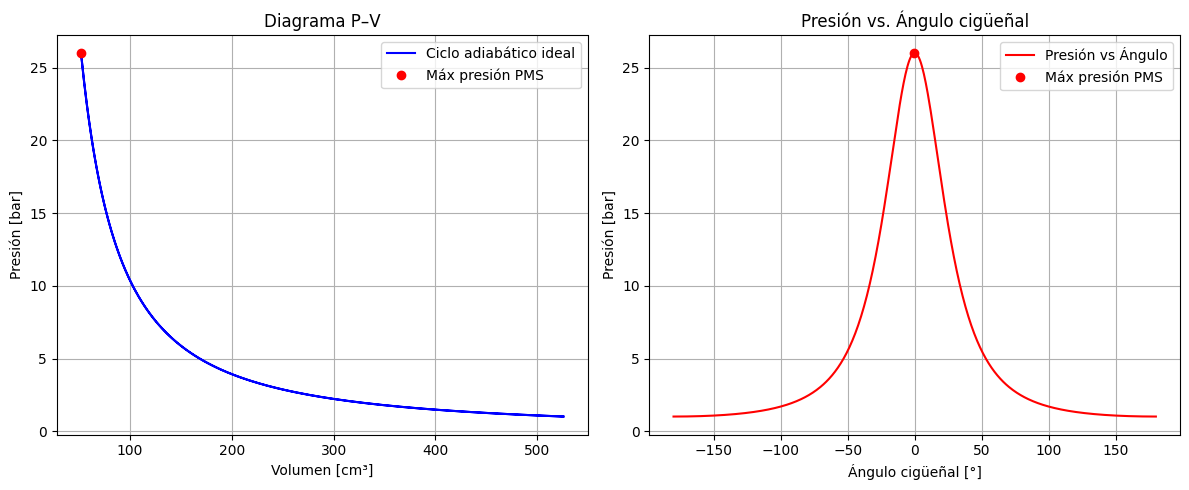

In [ ]:
# *** CICLO ADIABÁTICO P–α ***
# Parámetros geométricos MCI
D = 85.5e-3     # diámetro cilindro [m]
r = 41.25e-3    # radio cigüeñal [m]
L = 144.375e-3  # longitud biela [m]
Vcc = 52e-6     # volumen cámara combustión [m³]
# Parámetros Aire
gamma = 1.403   # coeficiente adiabático
Pa = 101325     # presión atmosférica inicial [Pa]

# Ángulo cigüeñal (0° a 360°)
alfa_deg = np.linspace(-180, 180, 500) # Centro gráfico en 0°
alfa_rad = np.radians(alfa_deg)

# Volumen instantáneo en función ángulo cigüeñal
A = np.pi * D**2 / 4
V_alfa = Vcc + A * (L + r - r * np.cos(alfa_rad) - np.sqrt(L**2 - (r * np.sin(alfa_rad))**2))

# Presión teórica adiabática (normalizada a P1 y V1)
Vt = np.max(V_alfa)              # Volumen inicial Vc+Vcc PMI)
P = Pa * (Vt / V_alfa)**gamma  # Presión expansión/compresión adiabática

# Índice de PMS: volumen mínimo → máxima presión
idx_pms = np.argmin(V_alfa)
alfa_pms = alfa_deg[idx_pms]
P_pms = P[idx_pms]
P_360 = P[-1]
V_pms = V_alfa[idx_pms]

# Crear figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Diagrama P-V
axs[0].plot(V_alfa * 1e6, P / 1e5, color='blue', label='Ciclo adiabático ideal')
axs[0].plot(V_pms * 1e6, P_pms / 1e5, 'ro', label='Máx presión PMS')
axs[0].set_xlabel('Volumen [cm³]')
axs[0].set_ylabel('Presión [bar]')
axs[0].set_title('Diagrama P–V')
axs[0].legend()
axs[0].grid(True)

# Diagrama P–α
axs[1].plot(alfa_deg, P / 1e5, color='red', label='Presión vs Ángulo')
axs[1].plot(alfa_pms, P_pms / 1e5, 'ro', label='Máx presión PMS')
axs[1].set_xlabel('Ángulo cigüeñal [°]')
axs[1].set_ylabel('Presión [bar]')
axs[1].set_title('Presión vs. Ángulo cigüeñal')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


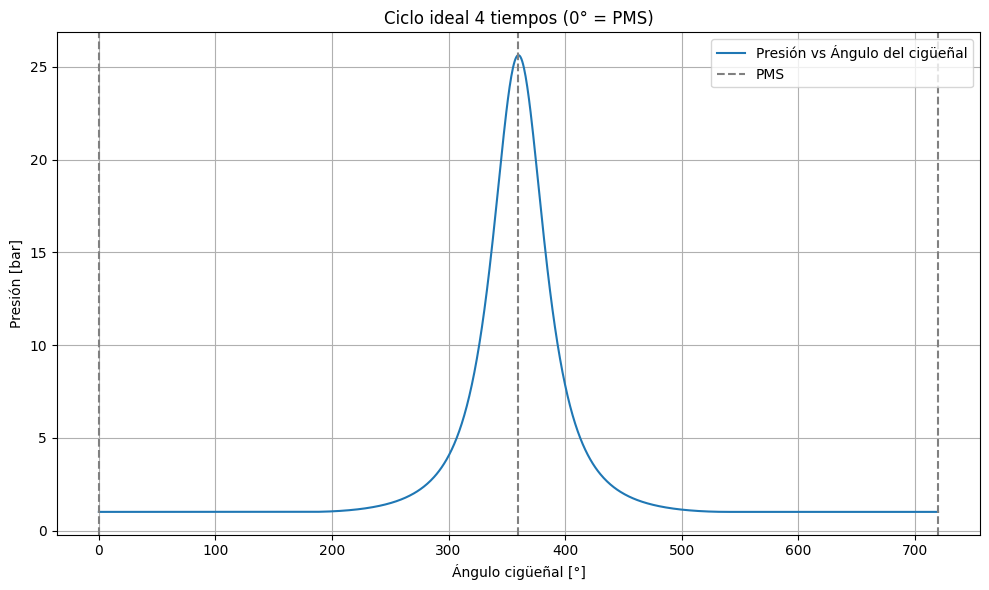

In [ ]:
# *** CICLO IDEAL P–α 4 TIEMPOS s/SALTO combustión***
# Parámetros del motor
# Parámetros geométricos MCI
D = 85e-3       # diámetro cilindro [m]
r = 41.25e-3    # radio cigüeñal [m]
L = 144.375e-3  # longitud biela [m]
Vcc = 52e-6     # volumen cámara combustión [m³]
# Parámetros Aire
gamma = 1.403   # coeficiente adiabático
Patm = 101325   # presión atmosférica inicial [Pa]

# Ángulo cigüeñal (0° a 720°)
alfa_deg = np.linspace(0, 720, 1000)
alfa_rad = np.radians(alfa_deg)

# Área pistón
A = np.pi * D**2 / 4

# Volumen instantáneo
V = Vcc + A * (L + r - r * np.cos(alfa_rad) - np.sqrt(L**2 - (r * np.sin(alfa_rad))**2))
V_max = np.max(V)
V_min = np.min(V)

# Presión / tiempo
P = np.zeros_like(V)

# Admisión (0°–180°): presión constante
P[(alfa_deg >= 0) & (alfa_deg < 180)] = Patm

# Compresión (180°–360°): adiabático
idx_comp = (alfa_deg >= 180) & (alfa_deg < 360)
Pcomp = Patm * (V_max / V[idx_comp])**gamma
P[idx_comp] = Pcomp
# Presión máxima al final de la compresión
P2 = Pcomp[-1]
P3 = P2 * 1  # incremento ideal x combustión (2 moderado 3 óptimo)

# Expansión (360°–540°): adiabático desde Pmáx
idx_exp = (alfa_deg >= 360) & (alfa_deg < 540)
P[idx_exp] = P3 * (V_min / V[idx_exp])**gamma # Sin salto comb P3 = P2*1

# Escape (540°–720°): presión constante
P[(alfa_deg >= 540) & (alfa_deg <= 720)] = Pa

# Graficar
plt.figure(figsize=(10,6))
plt.plot(alfa_deg, P / 1e5, label='Presión vs Ángulo del cigüeñal')
plt.axvline(0, color='gray', linestyle='--', label='PMS')
plt.axvline(360, color='gray', linestyle='--')
plt.axvline(720, color='gray', linestyle='--')
plt.xlabel('Ángulo cigüeñal [°]')
plt.ylabel('Presión [bar]')
plt.title('Ciclo ideal 4 tiempos (0° = PMS)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

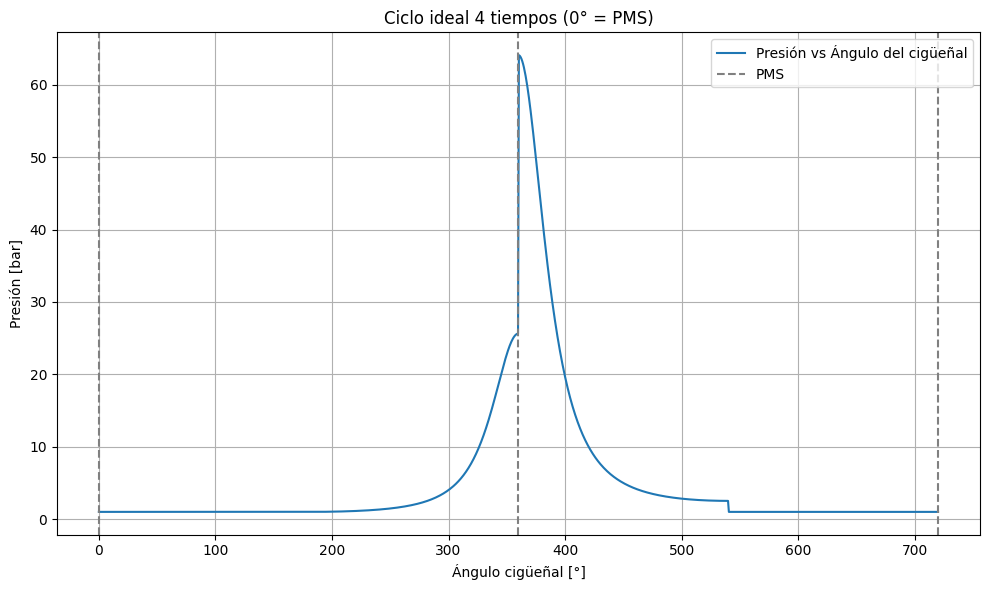

In [ ]:
# *** CICLO IDEAL P–α 4 TIEMPOS c/ salto combustión***
# Parámetros del motor
# Parámetros geométricos MCI
D = 85e-3       # diámetro cilindro [m]
r = 41.25e-3    # radio cigüeñal [m]
L = 144.375e-3  # longitud biela [m]
Vcc = 52e-6     # volumen cámara combustión [m³]
# Parámetros Aire
gamma = 1.403   # coeficiente adiabático
Patm = 101325   # presión atmosférica inicial [Pa]

# Ángulo cigüeñal (0° a 720°)
alfa_deg = np.linspace(0, 720, 1000)
alfa_rad = np.radians(alfa_deg)

# Área pistón
A = np.pi * D**2 / 4

# Volumen instantáneo
V = Vcc + A * (L + r - r * np.cos(alfa_rad) - np.sqrt(L**2 - (r * np.sin(alfa_rad))**2))
V_max = np.max(V)
V_min = np.min(V)

# Presión / tiempo
P = np.zeros_like(V)

# Admisión (0°–180°): presión constante
P[(alfa_deg >= 0) & (alfa_deg < 180)] = Patm

# Compresión (180°–360°): adiabático
idx_comp = (alfa_deg >= 180) & (alfa_deg < 360)
Pcomp = Patm * (V_max / V[idx_comp])**gamma
P[idx_comp] = Pcomp
# Presión máxima al final de la compresión
P2 = Pcomp[-1]
P3 = P2 * 2.5  # incremento ideal x combustión (2 moderado 3 óptimo)

# Expansión (360°–540°): adiabático desde Pmáx
idx_exp = (alfa_deg >= 360) & (alfa_deg < 540)
P[idx_exp] = P3 * (V_min / V[idx_exp])**gamma # Sin salto comb P3 = P2*1

# Escape (540°–720°): presión constante
P[(alfa_deg >= 540) & (alfa_deg <= 720)] = Pa

# Graficar
plt.figure(figsize=(10,6))
plt.plot(alfa_deg, P / 1e5, label='Presión vs Ángulo del cigüeñal')
plt.axvline(0, color='gray', linestyle='--', label='PMS')
plt.axvline(360, color='gray', linestyle='--')
plt.axvline(720, color='gray', linestyle='--')
plt.xlabel('Ángulo cigüeñal [°]')
plt.ylabel('Presión [bar]')
plt.title('Ciclo ideal 4 tiempos (0° = PMS)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()